<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 22 Class 3 02/24</h1>
</div>

## Objectives for this week:
* Unsupervised Learning
* Clustering

## Todays Agenda
* Typing
* More on Logistic Regression
* Review and discussion of machine learning
* Clustering Algorithms

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1> Named Tuples</h1>
</div>

What are Named Tuples?
===

Named tuples assign meaning to each position in a tuple and allow for more readable, self-documenting code. They can be used wherever regular tuples are used, and they add the ability to access fields by name instead of position index.(https://docs.python.org/3/library/collections.html#collections.namedtuple)

It's a tuple subclass provided to us from the collections module of the Python standard library. `namedtuple` is a factory function for creating tuples with named fields.

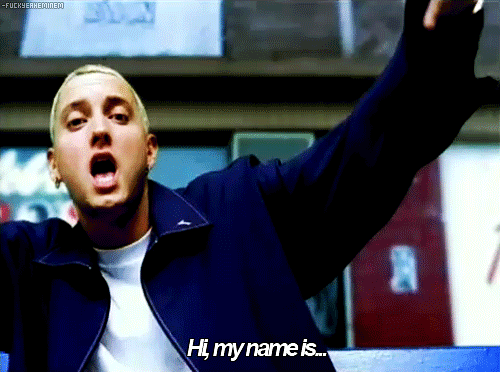

The Collections Library
===

This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple. There are numerous available containers that can help in situations where the built-in containers are not sufficient.
(https://docs.python.org/3/library/collections.html)


What's a Factory Function
==

Simply a factory(or Factory Function) is a function that returns an object with the same structure everytime it's used. In Python there are similarites to classes as they are both blueprints for objects but the outputs of factory functions lack many benefits of classes(inheritence,etc). 

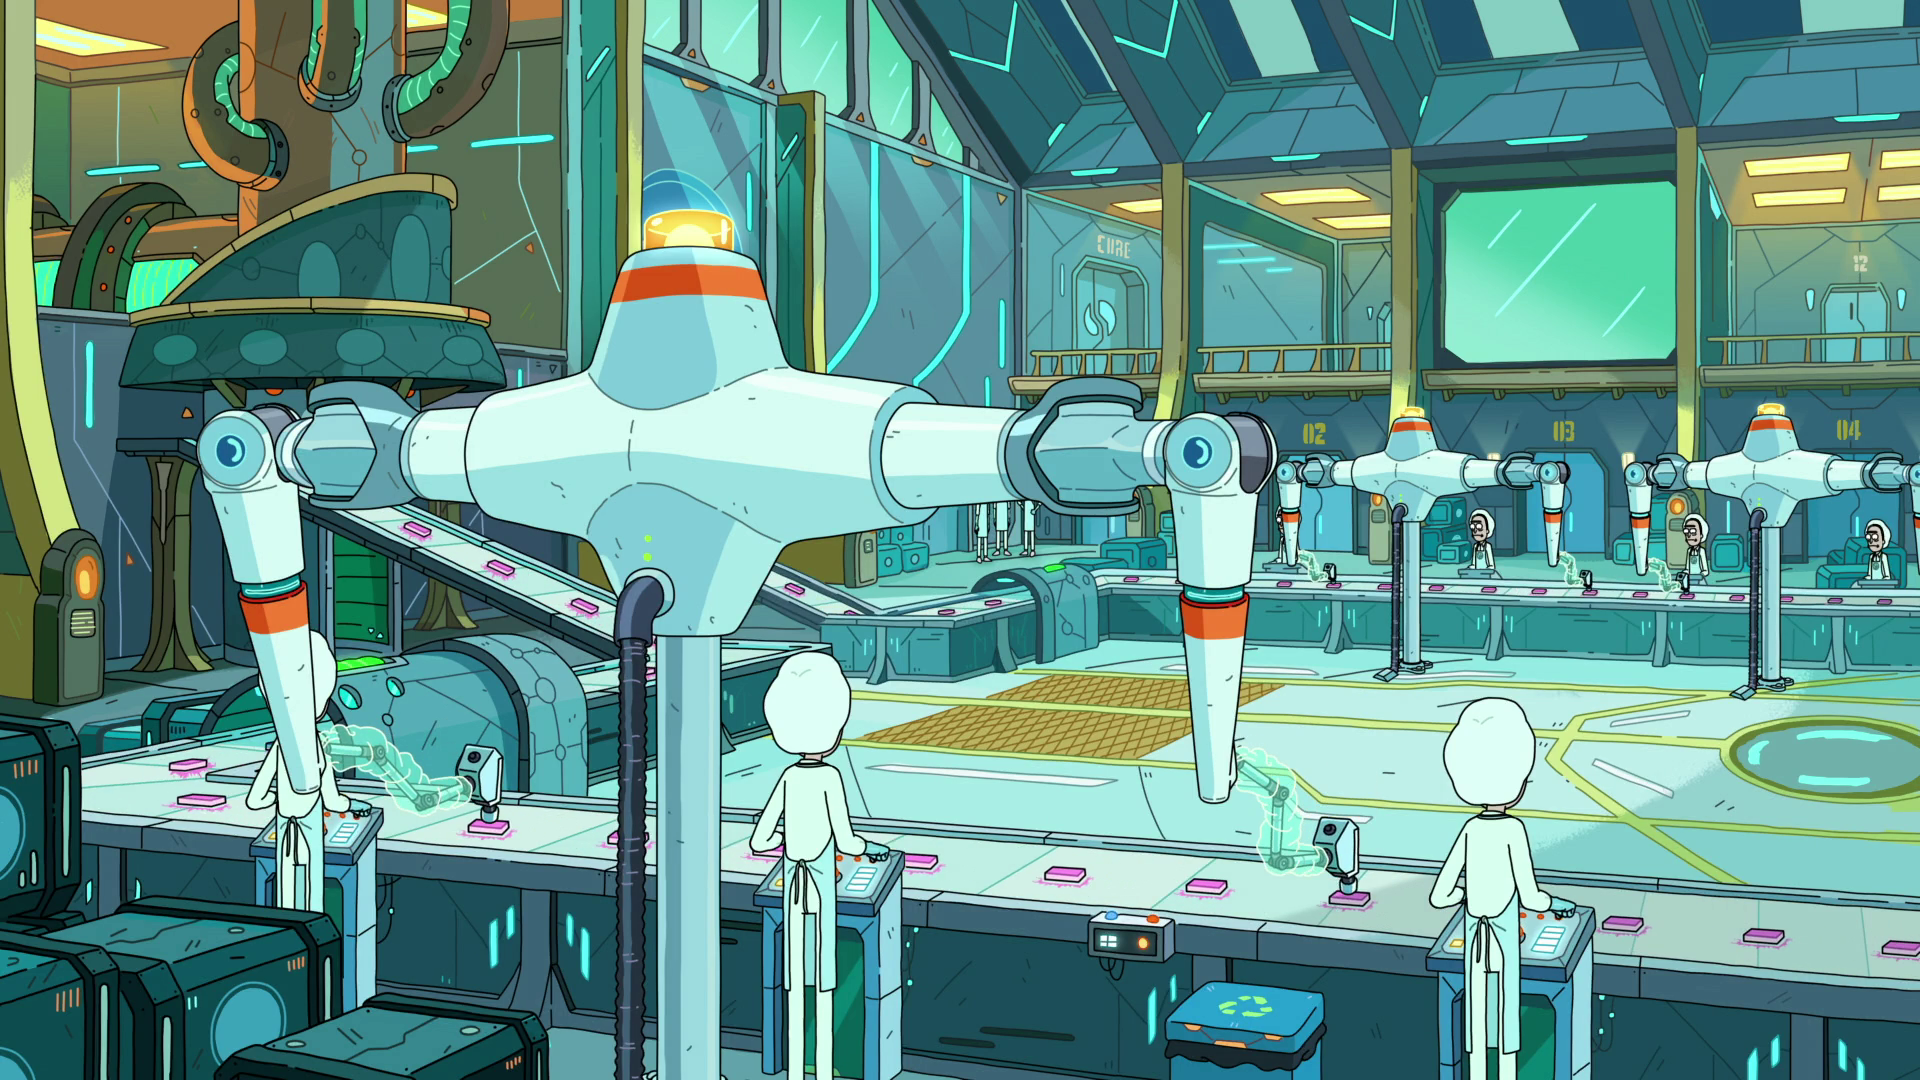

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1> Let's Jump into it!</h1>
</div>

usually you use namedtuples to create a class type structure that has attributes you can access teh value of
so instead of an entire class for Point
class Point:
    def __init__(x,y):
        self.x = x
        self.y = y

you can do

point = namedtuple('point', ['x', 'y'])
point.x = 5
point.y = 6


In [3]:
#Import namedtuple from the collections library
from collections import namedtuple
#Use namedtuple to setup 
Student = namedtuple('Student', ['name','age','class_'])

# We pass in the values into the Student Type
first_student = Student("Mal", 25, "Data Science")
print(first_student)

#We can access the values by index(Same as regular Tuples)
print(first_student[0])

#or we can access the field by it's name
print(first_student.age)
#We use the dot-operator 
# because the Square brace[] is reserved for indexes


Student(name='Mal', age=25, class_='Data Science')
Mal
25


Why use Named Tuples?
==
1. Benefits of Tuple such as immutibilty, less memory consumption than dictionaries

2. The ability of accessing values by name(key) increase code self-documentation.

In [5]:
# fields attribute shows us what fields belongs to the tuple
print(first_student._fields)

('name', 'age', 'class_')


In [6]:
#We can turn iterables into Named Tuples
#They must follow the same format
# Use _make method
second_student = Student._make(["Jim", 32, "Progessive Web"])
print(second_student)

Student(name='Jim', age=32, class_='Progessive Web')


In [7]:
# We can turned named tuples into dicts if needed
#Use _asdict method
print(second_student._asdict())

{'name': 'Jim', 'age': 32, 'class_': 'Progessive Web'}


In [8]:
#Example without NamedTuple

cards = [("Heart","King"), ("Spade", "Jack"), ("Diamond","Ace")]

for card in cards:
    print(f"This card's Suit is {card[1]} and the value is {card[0]}")

This card's Suit is King and the value is Heart
This card's Suit is Jack and the value is Spade
This card's Suit is Ace and the value is Diamond


In [9]:
# Example with namedtuple
from collections import namedtuple

Card = namedtuple("Card", ["suit","value"])

cards = [Card("Heart","King"), Card("Spade", "Jack"), Card("Diamond","Ace")]

for card in cards:
    print(f"This card's Suit is {card.suit} and the value is {card.value}")


This card's Suit is Heart and the value is King
This card's Suit is Spade and the value is Jack
This card's Suit is Diamond and the value is Ace


<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1> Continuing from Yesterday</h1>
</div>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

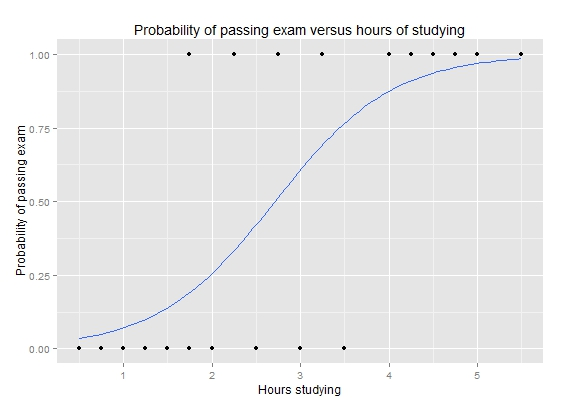

In [11]:
# generating a fake dataset, it's just a straight line with some gaussian noise:
xmin, xmax = 0, 20
n_samples = 100
np.random.seed(0)
X = np.random.normal(loc=5, size=n_samples)
Y = (X > 5).astype(int)

df = pd.DataFrame(np.array([X,Y]).T, columns=['Hours Studied', 'Passed Exam'])
df.head()

Hours Studied  Passed Exam
0       6.764052          1.0
1       5.400157          1.0
2       5.978738          1.0
3       7.240893          1.0
4       6.867558          1.0

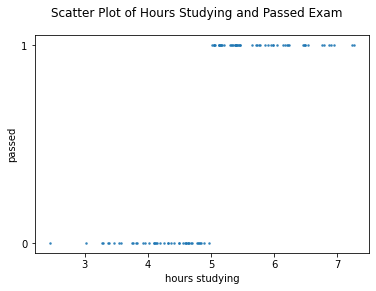

In [12]:
plt.scatter(x='Hours Studied', y='Passed Exam', data=df, s=2.5, alpha=0.75)
plt.suptitle("Scatter Plot of Hours Studying and Passed Exam")
plt.xlabel('hours studying')
plt.ylabel('passed')
plt.yticks([0, 1])
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

# enter the data into independent and dependent variables
# we're using fake data but assume its the data below
#df = read_csv('student_grades')
# X = df[['Height', 'Weight']]
X = df['Hours Studied'].values.reshape(-1,1)
Y = df['Passed Exam']

# split the data into 75% training data and 25% test data
# X_train -> X training data ; x_test -> X test data
# Y_train -> Y training data ; y_test -> Y test data
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.25)

# create an instance of a logistic regression
logreg = LogisticRegression(C=1e5)
# fit the logistic regression onto the data
logreg.fit(X_train, Y_train)

# now that we've fit a logistic regression based on our test data
# we can use the fitted logistic regression line to predict 
# what the y values would be for our x_test data
y_pred = logreg.predict(x_test)

# we can check our results with a confusion matrix
# confusion matrix will show us both the predictions (y_pred)
# and actual values (y_test) and whether or not our
# model correctly predicted or incorrectly predicted
# the actual values
#              prediction
#               0   1 
# actuals   0  CP  IP
#           1  IP  CP
# CP - correct prediction; IP - incorrect predictions
# if actual = 0 and prediction = 0 -> prediction was correct
# if actual = 1 and prediction = 0 -> prediction was incorrect
# if actual = 1 and prediction = 0 -> prediction was correct
# if actual = 1 and prediction = 1 -> prediction was correct

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

# we can also use some metrics to check correctness:
# accuracy is percentage of predictions that were correct
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# precision is the percentage of identifications were correct
# meaning if our indicator (1) was predicted, what percentage of 1s were correct
print(f"Precision: {precision_score(y_test, y_pred)}")
# recall is what percentage of our indicator (1) were correctly predicted
print(f"Recall: {recall_score(y_test, y_pred)}")

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, x_test,y_test.ravel())
print(f"Cross-validation scores: {scores}")
print(f"Cross-validation mean: {scores.mean()}")


[[10  0]
 [ 0 15]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Cross-validation scores: [1. 1. 1. 1. 1.]
Cross-validation mean: 1.0


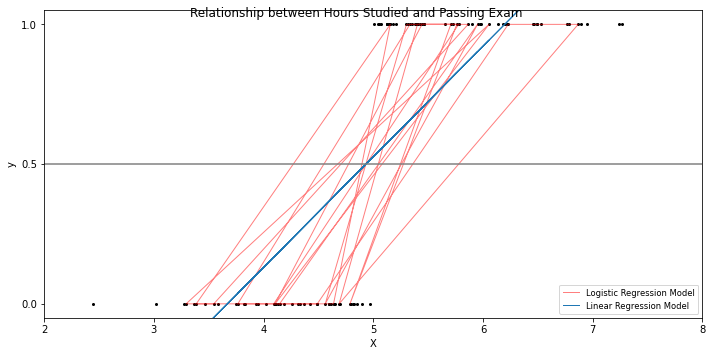

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

plt.figure(figsize=(10, 5))
plt.clf()
plt.scatter(X, Y, color='black', s=4)

loss = expit(x_test * logreg.coef_ + logreg.intercept_).ravel()
plt.plot(x_test, loss, color='red', linewidth=1, alpha=0.5)

ols = linear_model.LinearRegression()
ols.fit(X, Y)
plt.plot(x_test, ols.coef_ * x_test.reshape(-1,1) + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(0, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.05, 1.05)
plt.xlim(2, 8)
plt.suptitle("Relationship between Hours Studied and Passing Exam")
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

# Some notes about our work

When dealing with datasets there are some things we have to keep in mind:
* Data cleaning
  - Removing data that inaccurate, irrelevant or incomplete.
  - Transforming data to ensure they are the same type or format.
  - Checking if the data is acceptable for use.
* Filling in missing values 
  - data can be missing for a number of reasons (random error, systematic error, human error and incorrect sensor readings).
  - these values can be fixed in the following ways:
    * Removing the section that contains the missing data as long as it leaves enough data left to continue
    * Removing the attribute that consists of problematic data or data that is consistent or can correlate with another attribute
    * Assigning special values like `np.nan` for data that is missing for acceptable reasons (like we saw with the covid lab that had `Region/State` missing.
    * Estimating the missing value by taking the average or median value as the attribute
    * Predicting the value from its predecessors
* Removing outliers
* Transforming and reducing data
  - also known as data wrangling or munging, transforming is taking our machine learning algorithm cannot use and converting into something usable
  - data reduction is simply removing attributes that are less likely to have a positive effect on our results

# Questions

Some interview questions you should be able to answer:
1. What do you understand by Machine Learning?
2. What are the different Algorithms techniques in Machine Learning?
3. What is the difference between supervised and unsupervised machine learning?
4. What is Overfitting in Machine Learning?
5. What is the difference between classification and regression?

# Different Algorithm Techniques in Machine Learning

**Classification** - the process of assigning one or some among the predefined categories to each item. We use this when we want to be able to apply a category to new data.  
**Regression**  - the process of estimating an output value based on multiple factors. We use this when we want to be able to predict the output of new data.  
**Clustering**  - the process of segmenting a group of items in subgroups each of which contains similar ones. We do this when we want to organize new data.  
**Hybrids** - the process of using a mixture of the tasks described above in order to make sense of data. We use this when one or more of the techniques above do not help us by itself.

Types of ML with examples:
* Classification - Pick one of N labels such as: Cat, dog, horse, or bear  
* Regression - Predict numerical values such as: Click-through rate  
* Clustering - Group similar examples such as: Most relevant documents 

**Wait, Classification and Clustering seem similar what's the difference?**

Supervision is the answer.

# What is the difference between supervised and unsupervised machine learning?

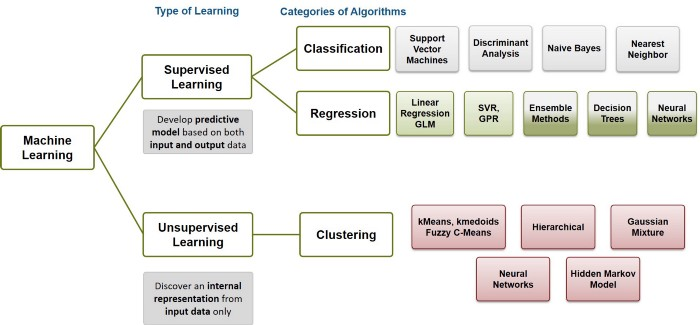

# Labeling

The process for supervised machine learning.  
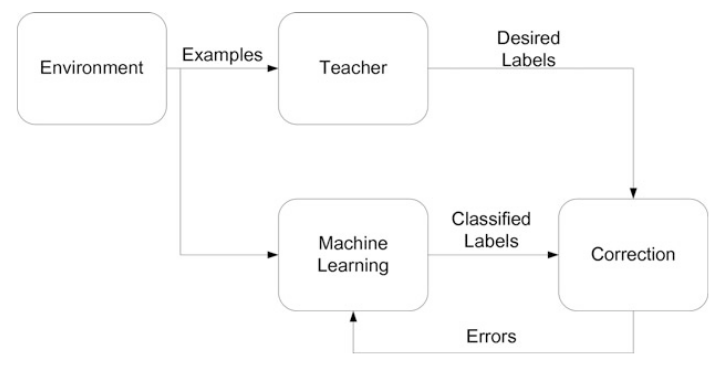  
The process for unsupervised machine learning.  
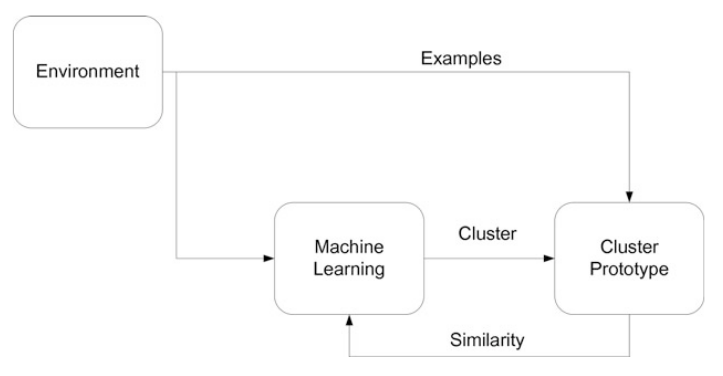  

### For **Supervised Learning** we must provide proper labeling of our inputs/outputs. This is so that the algorithm can use the labels to determine if it's correct or not. We also intervene based on how the algorithm does at predicting our labels.

### For **Unsupervised Learning** no labels are needed. The algorithm uses prototypes which characterizes its own cluster and the algorithm attempts to optimize for those prototypes. Whereas our supervised learning optimized by minimizing the error, unsupervised learning optimizes by maximizing the similarities between the cluster prototypes and data.

Supervised Learning:
* It uses data that is labeled
* It does not require excess data for accuracy
* Computational complexity is less
* It does not find patterns on its own from a dataset

Unsupervised Learning:
* It uses data that is unlabeled
* It requires excess data for accuracy
* Computational complexity is greater
* It finds patterns on its own from a given dataset

Some Supervised Algorithms:
* Regression
  - Linear Regression
* Classification
  - Logistic Regression
  - K-Nearest Neighbors

Unsupervised Algorithms:
* Cluster analysis
  - K-means clustering
* Dimensionality Reduction
  - Principle Component Analysis

**Note: There's also Semi-Supervised Learning and Reinforcement Learning which we'll talk about.**

# What is overfitting in machine learning?

So far, we've seen how with linear regressions we can calculate errors in different ways. We've also seen how in Logistic Regressions we can calculate metrics like accuracy and precision. These tools are model specific and depend on the type of algorithm we use.

Overfitting is a concept that applies to all of these sorts of machine learning. If we train our model too well, it will be completely accurate for our training/test data but be brittle when dealing with new data. We'll get variance in the results to new data. If we train our model poorly, our model will be incorrect and make too many errors with new data.

We've talked about this before as being the Bias vs. Variance problem.

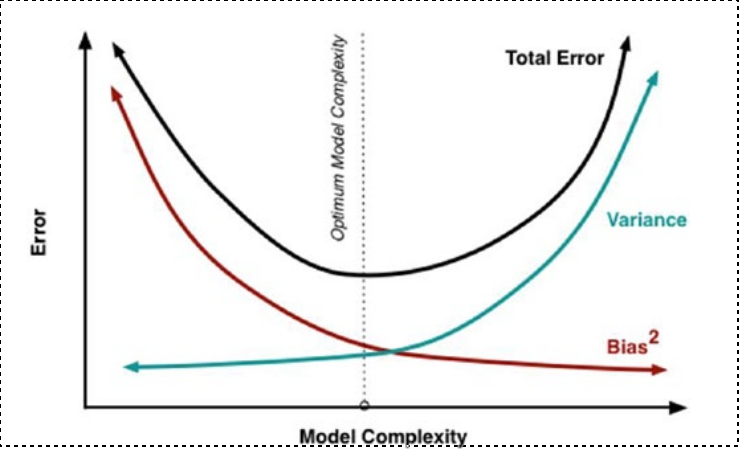

We've seen how we can toy with our model to try to make our results better. But at the risk of overfitting our model to our data. One way we can test for what hyperparameters are best for our model is through the use of cross-validation

# Cross Validation

Cross-validation, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.

[Cross Validation Wikipedia](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Motivation)

### What is Cross-Validation?

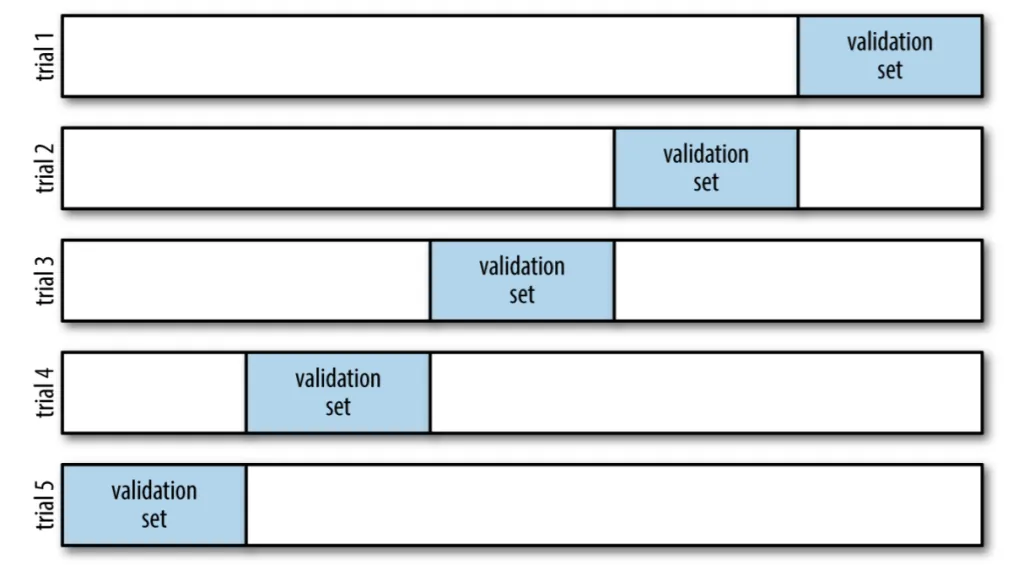

In cross-validation, the data is instead split multiple times and multiple models are trained. The most commonly used version of cross-validation is k-times cross-validation, where k is a user-specified number, usually 5 or 10.

### Benefits & Drawbacks of Using Cross-Validation

There are several advantages to using cross-validation instead of a single division into one training and one set of tests. First of all, remember that train_test_split performs a random division of data.

Imagine that we are “lucky” at randomly splitting the data, and all the hard-to-categorize examples end up in the training set. In this case, the test set will only contain “simple” examples, and the accuracy of our test set will be unrealistic.

Conversely, if we are “unlucky” we may have randomly placed all of the hard-to-rank examples in the test set and therefore have an unrealistic score.

However, when using cross-validation, each example will be in the test set exactly once: each example is in one of the folds, and each fold is the test set once. Therefore, the model must generalize well to all samples in the dataset for all cross-validation scores (and their mean) to be high.

Having multiple splits of the data also provides information about the sensitivity of our model to the selection of the training data set. For  example say we saw accuracies between 80% and 100%. That’s quite a range, and it gives us an idea of how the model might work in the worst-case scenario and the best-case scenario when applied to new data.

Another advantage of cross-validation over using a single data division is that we use our data more efficiently. When using train_test_split, we typically use 75% of the data for training and 25% of the data for evaluation.

When using five-fold cross-validation, on each iteration we can use four-fifths of the data (80%) to fit the model. When using 10 cross-validations, we can use the nine-tenths of the data (90%) to fit the model. More data will generally result in more accurate models.

[source](https://thecleverprogrammer.com/2020/10/25/what-is-cross-validation-in-machine-learning/)

# Let's talk about our process and reporting 

There are some steps we've covered so far:
* Data loading and pre-processing data
* Building the model
* Training the model
* Testing the model

How does that fit into the data science work flow we spoke about?

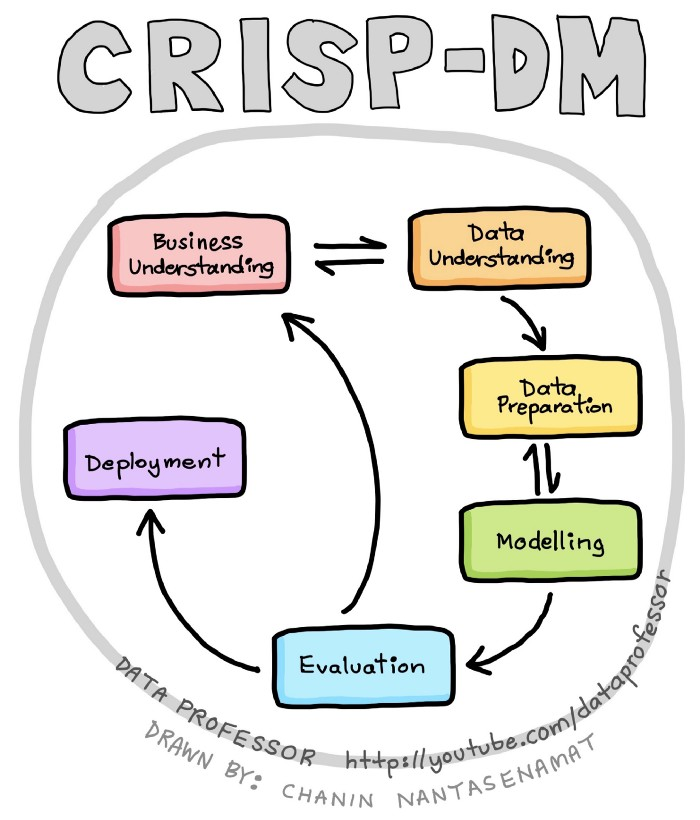

The CRISP-DM framework is comprised of 6 major steps:
* **Business understanding** — This entails the understanding of a project’s objectives and requirements from the business viewpoint. Such business perspectives are used to figure out what business problems to solve via the use of data mining.
* **Data understanding** — This phase allows us to become familiarize with the data and this involves performing exploratory data analysis. Such initial data exploration may allow us to figure out which subsets of data to use for further modeling as well as aid in the generation of hypothesis to explore.
* **Data preparation** — This can be considered to be the most time-consuming phase of the data mining process as it involves rigorous data cleaning and pre-processing as well as the handling of missing data.
* **Modelling** — The pre-processed data are used for model building in which learning algorithms are used to perform multivariate analysis.
* **Evaluation** — In performing the 4 aforementioned steps, it is important to evaluate the accrued results and review the process performed thusfar to determine whether the originally set business objectives are met or not. If deemed appropriate, some steps may need to be performed again. Rinse and repeat. Once it is deemed that the results and process are satisfactory then we are ready to move to deployment. Additionally, in this evaluation phase, some findings may ignite new project ideas for which to explore.
* **Deployment** — Once the model is of satisfactory quality, the model is then deployed, which may range from being a simple report, an API that can be accessed via programmatic calls, a web application, etc.

Notice something? This is not entirely one role in data science.

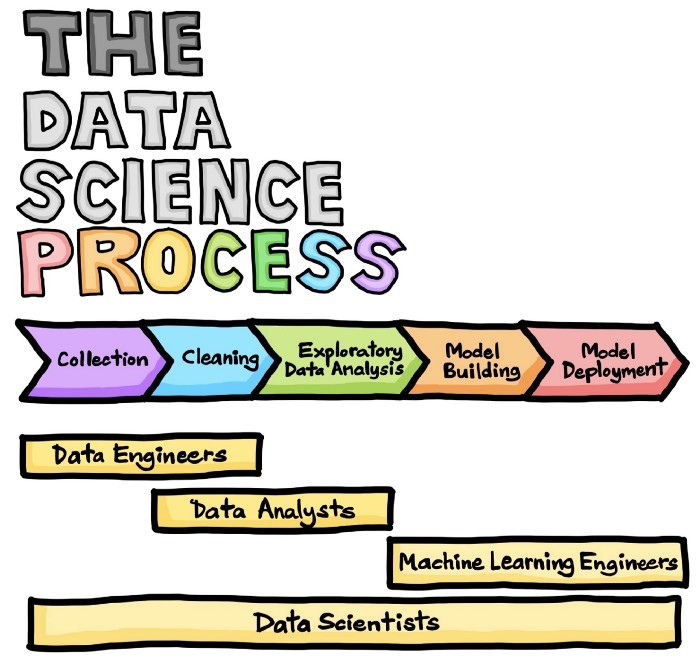

But we haven't spoken too much about the analysis reporting side of things. 

The overall structure of a data analysis report is simple:
1. Introduction 
  * Summary of the data and what is going to be studied as well as any relevant information to introduce your subject material
2. Body
  * Discuss data, methods, analysis, results
3. Conclusion(s)/Discussion
4. Appendix/Appendices

Let's take a look at a full fledged report.



# Clustering

[source](https://developers.google.com/machine-learning/clustering/overview)

### What is Clustering?

When you're trying to learn about something, say music, one approach might be to look for meaningful groups or collections. You might organize music by genre, while your friend might organize music by decade. How you choose to group items helps you to understand more about them as individual pieces of music. You might find that you have a deep affinity for punk rock and further break down the genre into different approaches or music from different locations. On the other hand, your friend might look at music from the 1980's and be able to understand how the music across genres at that time was influenced by the sociopolitical climate. In both cases, you and your friend have learned something interesting about music, even though you took different approaches.

In machine learning too, we often group examples as a first step to understand a subject (data set) in a machine learning system. Grouping unlabeled examples is called clustering.

As the examples are unlabeled, clustering relies on unsupervised machine learning. If the examples are labeled, then clustering becomes classification.

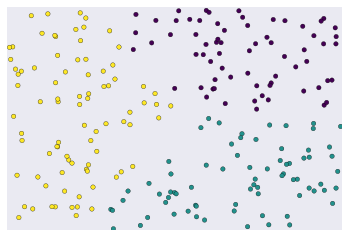  
Figure 1: Unlabeled examples grouped into three clusters.

Before you can group similar examples, you first need to find similar examples. You can measure similarity between examples by combining the examples' feature data into a metric, called a similarity measure. When each example is defined by one or two features, it's easy to measure similarity. For example, you can find similar books by their authors. As the number of features increases, creating a similarity measure becomes more complex. We'll later see how to create a similarity measure in different scenarios.
What are the Uses of Clustering?

Clustering has a myriad of uses in a variety of industries. Some common applications for clustering include the following:
* market segmentation
* social network analysis
* search result grouping
* medical imaging
* image segmentation
* anomaly detection

After clustering, each cluster is assigned a number called a cluster ID. Now, you can condense the entire feature set for an example into its cluster ID. Representing a complex example by a simple cluster ID makes clustering powerful. Extending the idea, clustering data can simplify large datasets.

For example, you can group items by different features as demonstrated in the following examples:
* Group stars by brightness.
* Group organisms by genetic information into a taxonomy.
* Group documents by topic.

So what is an example of a clustering algorithm?

# K-Means Clustering

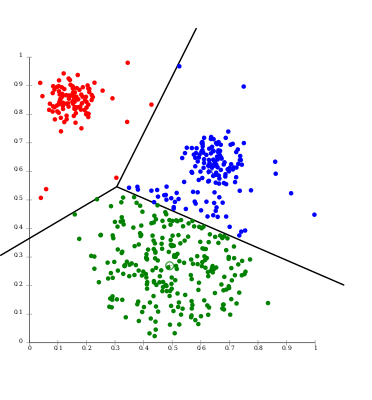

[Wikipedia definition](https://en.wikipedia.org/wiki/K-means_clustering):

> k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

Math definition: 

Given a set of observations $(x1, x2, ..., xn)$, where each observation is a $d$-dimensional real vector, k-means clustering aims to partition the $n$ observations into $k$ ($≤ n$) sets $S = \{S_1, S_2, ..., S_k\}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

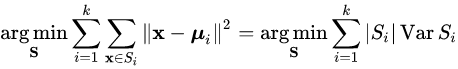

The aim of K-Means Clustering is to partition $N$ observations into $k$ clusters where the distance of each point of a cluster to a centroid is minimized.

Centroid of a triangle
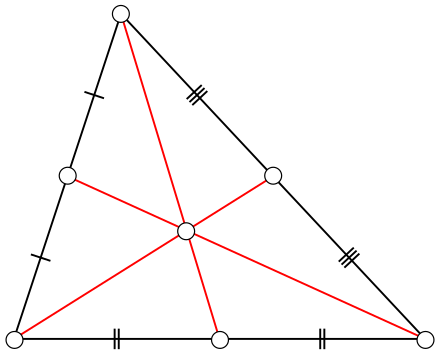

Centroids of points (as found by k-means clustering)
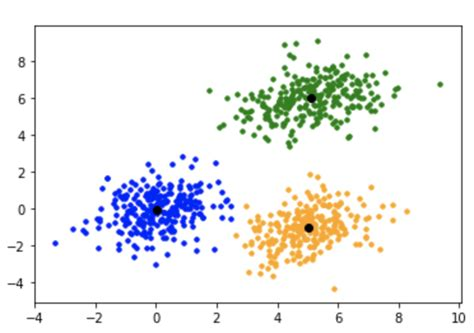

What the heck does this mean?

[gif](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

### Resources:
https://www.ibm.com/cloud/learn/unsupervised-learning  
https://towardsdatascience.com/a-brief-introduction-to-unsupervised-learning-20db46445283  
https://developers.google.com/machine-learning/clustering/overview  
https://towardsdatascience.com/clustering-concepts-algorithms-and-applications-f512a949549a  
 